# <font color = blue>Sobre o conjunto de dados</font>

**Este conjunto de dados contém informações sobre a classificação de obesidade dos indivíduos. Os dados foram coletados de uma variedade de fontes, incluindo registros médicos, pesquisas e dados auto-relatados. O conjunto de dados inclui as seguintes colunas:**

* ID: Um identificador exclusivo para cada indivíduo
* Idade: a idade do indivíduo
* Gênero: O gênero do indivíduo
* Altura: A altura do indivíduo em centímetros
* Peso: O peso do indivíduo em quilogramas
* IMC: O índice de massa corporal do indivíduo, calculado como peso dividido pela altura ao quadrado
* Rótulo: A classificação de obesidade do indivíduo, que pode ser uma das seguintes:
    * Peso normal
    * Sobrepeso
    * Obeso
    * Abaixo do peso 

# <font color=blue>Análise Exploratória

In [20]:
!pip install seaborn
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


#### Imports

In [37]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

#### Leitura dos dados

In [2]:
df = pd.read_csv('Obesity Classification.csv')
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


#### Visualização geral dos dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


#### Dados estatísticos

> Verificar: Idade, peso

In [4]:
df.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


#### Traduzindo colunas

In [5]:
df.columns = ['id','idade','genero','altura','peso','imc','label']
df.head(3)

,id,idade,genero,altura,peso,imc,label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight


#### Quantidade de valores por registro

In [6]:
df.genero.value_counts()

genero
Male      56
Female    52
Name: count, dtype: int64

#### Filtros de dados

In [7]:
# Maiores ou igual a 100 anos
maior_idade = df.query('idade >= 100')
maior_idade

,id,idade,genero,altura,peso,imc,label
27,29,103,Female,130,30,13.3,Underweight
28,30,108,Male,210,120,37.2,Obese
55,58,102,Female,130,75,25.0,Overweight
56,59,107,Male,210,105,28.9,Obese
57,60,112,Female,120,85,27.5,Overweight


#### Pessoas com o peso normal

* Altura média = 1.75
* Peso médio = 65.1 kg
* IMC = 22.8
* Gênero = 17(M), 12(F)


In [8]:
normal = df.query('label == "Normal Weight"')
normal.describe()

,id,idade,altura,peso,imc
count,29.000000,29.000000,29.000000,29.000000,29.000000
mean,49.034483,42.275862,166.724138,65.172414,22.834483
std,26.137661,21.250036,22.331746,8.709883,1.338249
min,1.000000,16.000000,120.000000,55.000000,21.200000
25%,31.000000,26.000000,150.000000,55.000000,21.200000
50%,53.000000,35.000000,175.000000,65.000000,22.700000
75%,68.000000,53.000000,180.000000,75.000000,24.200000
max,94.000000,92.000000,210.000000,80.000000,25.300000


#### Criando um dataframe com os dados

In [9]:
dados_normal = {
    'altura': [1.75],
    'peso': [65.1],
    'imc': [22.8],
    'genero_M': [17],
    'genero_F': [12]
}

dados_normal = pd.DataFrame(dados_normal)
dados_normal

,altura,peso,imc,genero_M,genero_F
0,1.75,65.1,22.8,17,12


In [10]:
# quantidade de valores por classe
normal.genero.value_counts()

genero
Male      17
Female    12
Name: count, dtype: int64

#### Dashbord

Text(0.5, 1.0, 'Padrão de Peso Normal')

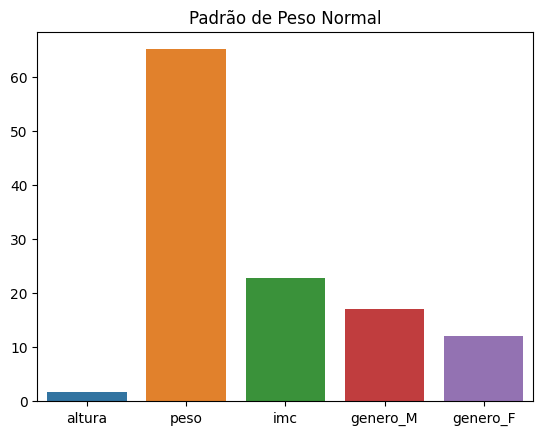

In [11]:
p = sns.barplot(data=dados_normal)     
p.set_title("Padrão de Peso Normal")

#### Pessoas com obesidade
* Altura média = 2.03
* Peso médio = 108.3 kg
* IMC = 32.3
* Gênero = 12(M)

In [12]:
obeso = df.query('label == "Obese"')
obeso.describe()

,id,idade,altura,peso,imc
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,27.166667,69.750000,203.333333,108.333333,32.341667
std,16.840607,23.653272,7.784989,7.177406,3.005891
min,5.000000,45.000000,190.000000,100.000000,28.900000
25%,15.000000,53.500000,200.000000,103.750000,30.325000
50%,27.000000,58.500000,205.000000,107.500000,31.200000
75%,37.500000,90.500000,210.000000,111.250000,34.200000
max,59.000000,108.000000,210.000000,120.000000,37.200000


In [13]:
obesos = {
    'altura': [2.03],
    'peso': [108.3],
    'imc': [32.3],
    'genero_M': [12]
}

obesos = pd.DataFrame(obesos)
obesos

,altura,peso,imc,genero_M
0,2.03,108.3,32.3,12


In [14]:
obeso.genero.value_counts()

genero
Male    12
Name: count, dtype: int64

#### Dashboard

Text(0.5, 1.0, 'Padrão de Obesidade')

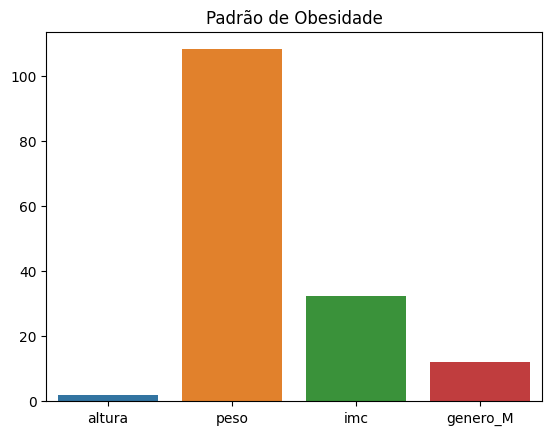

In [15]:
p = sns.barplot(data=obesos)     
p.set_title("Padrão de Obesidade")

#### Tabela de peso
* Abaixo do peso = 35kg
* Peso normal = 63kg
* Obesidade = Acima dos 100kg
* Sobrepeso = 30 até 82

<Axes: xlabel='label', ylabel='peso'>

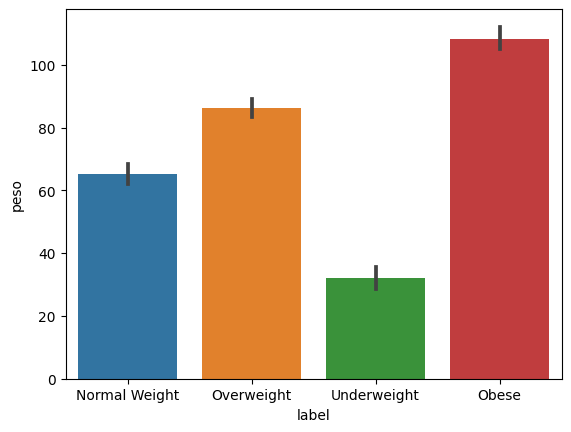

In [16]:
sns.barplot(x='label', y='peso', data=df)
     


#### Criar um novo dataset

In [18]:
df.to_csv('dataset_tratado.csv')

# <font color=blue>Análise Preditiva

#### Separando as variáveis

In [19]:
previsores = df.drop(columns=['label', 'genero'])
classe = df.label

#### Separando as amostras

In [20]:
SEED = 54

x_train, x_test, y_train, y_test = train_test_split(previsores, classe, test_size=0.25,random_state=SEED)

#### Treinando as variáveis, com o modelo Random forest

In [21]:
floresta = RandomForestClassifier(n_estimators=100)
floresta.fit(x_train, y_train)

RandomForestClassifier()

####  Visualizando os atributos principais

In [22]:
floresta.estimators_[1]

DecisionTreeClassifier(max_features='sqrt', random_state=730634285)

#### Previsões do modelo

In [23]:
previsoes = floresta.predict(x_test)

#### Matrix Confusão

In [24]:
confusao = confusion_matrix(y_test, previsoes)

[Text(0.5, 40.249999999999986, 'Predição'), Text(77.25, 0.5, 'Real')]

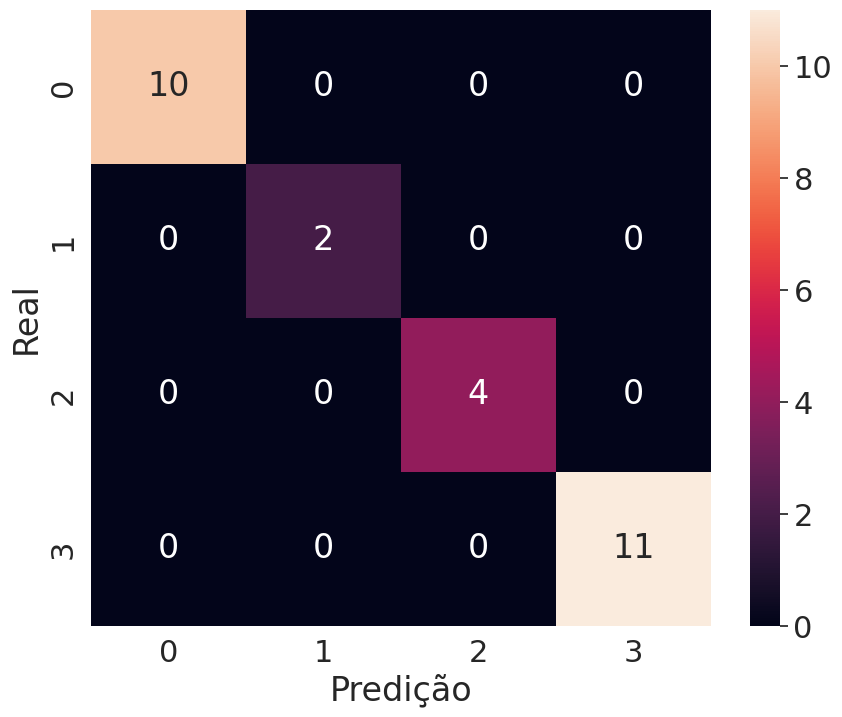

In [25]:
plt.figure(figsize=(10, 8))
sns.set(font_scale = 2)
sns.heatmap(confusao, annot=True, fmt="d").set(xlabel = 'Predição', ylabel='Real')

#### Score do modelo

In [26]:
taxa_acerto = accuracy_score(y_test, previsoes)
taxa_acerto

1.0

#### Realizar um testes

<font color = red>Predição do modelo

In [36]:
print('Dados do cliente\n', x_test.iloc[4])
print('===============================')
print('Previsão da classificação de obesidade:: \n',previsoes[4] )

Dados do cliente
 id         62.0
idade      21.0
altura    160.0
peso       35.0
imc        16.7
Name: 59, dtype: float64
Previsão da classificação de obesidade:: 
 Underweight


<font color=green>Dados do Dataset

In [35]:
print('Dados do cliente\n', x_test.iloc[4])
print('===============================')
print('Previsão da classificação de obesidade: \n',y_test.iloc[4])

Dados do cliente
 id         62.0
idade      21.0
altura    160.0
peso       35.0
imc        16.7
Name: 59, dtype: float64
Previsão da classificação de obesidade: 
 Underweight


##### Salvando a máquina de predição

In [38]:
pickle.dump(previsoes, open('robot_randomForest_obese.sav', 'wb'))